In [1]:
import generator

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# No outliers, no drift

In [3]:
data = [generator.generate_step(t=t, period=24, amplitude=100, error=20, mean=200) for t in range(24*7)]

In [4]:
df = pd.DataFrame(data={
    'x': range(24*7),
    'ds': pd.date_range(start="now", periods=24*7, freq='1h'),
    'y': data
})

In [5]:
df

,x,ds,y
0,0,2022-06-23 14:19:23.822033,203.515979
1,1,2022-06-23 15:19:23.822033,239.472228
2,2,2022-06-23 16:19:23.822033,255.285904
3,3,2022-06-23 17:19:23.822033,290.458895
4,4,2022-06-23 18:19:23.822033,303.816944
...,...,...,...
163,163,2022-06-30 09:19:23.822033,107.013680
164,164,2022-06-30 10:19:23.822033,124.205968
165,165,2022-06-30 11:19:23.822033,133.042161
166,166,2022-06-30 12:19:23.822033,160.718640


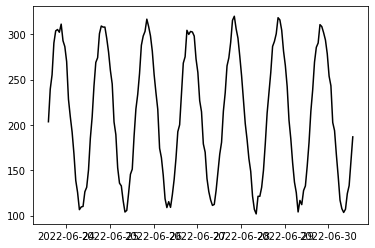

In [6]:
plt.plot(df.ds, df.y, c="k")
plt.show()

In [61]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import tensorflow as tf

from alibi_detect.cd import MMDDriftOnline

In [62]:
pred_array = df[['y']].to_numpy()
pred_array

array([[203.51597873],
       [239.4722283 ],
       [255.28590436],
       [290.45889495],
       [303.81694366],
       [305.29478503],
       [302.2810365 ],
       [311.23087584],
       [292.89941323],
       [286.50782104],
       [269.94316415],
       [228.35035467],
       [209.16794606],
       [192.18882995],
       [168.29341431],
       [138.66093032],
       [125.54806291],
       [106.51780207],
       [109.50776101],
       [110.08618884],
       [126.26325089],
       [131.22893174],
       [150.40604556],
       [185.16691242],
       [208.82221785],
       [242.98906568],
       [268.99022906],
       [274.1585441 ],
       [300.70181729],
       [309.14373791],
       [307.96485606],
       [307.97854534],
       [295.49806958],
       [280.416077  ],
       [260.16837566],
       [245.238501  ],
       [203.26503336],
       [189.29920481],
       [152.73112123],
       [135.77152981],
       [132.72388052],
       [116.48392962],
       [103.89606205],
       [105

In [63]:
ert = 150
window_sizes = 24
cd = MMDDriftOnline(pred_array, ert, window_sizes, backend='tensorflow')

Generating permutations of kernel matrix..


Computing thresholds: 100%|██████████| 24/24 [00:34<00:00,  1.42s/it]


In [64]:
drifts = []
thresh = []
stats = []
# test_array = test_df[['y']].to_numpy()
for i in range(24*7):
    preds = cd.predict(pred_array[i], return_test_stat=True)
    data = preds["data"]
    drifts.append(data['is_drift'])
    thresh.append(data['threshold'])
    stats.append(data['test_stat'])

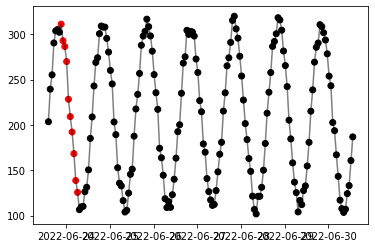

In [65]:
df['is_drift'] = drifts
df['colour'] = df['is_drift'].apply(lambda x: "k" if x==0 else "r")
df['threshold'] = thresh
df['stat'] = stats

plt.plot(df.ds, df.y, alpha=0.5, c='k')
plt.scatter(df.ds, df.y, c=df.colour, label=df.colour)
plt.show()

# Trend drift

In [66]:
N = 100

test_df = pd.DataFrame(data={
    'x': range(N),
    'ds': pd.date_range(start="now", periods=N, freq='1h'),
    'y': [generator.generate_step(t=t, period=24, amplitude=100, error=20, mean=200) for t in range(N)] + np.linspace(start=0, stop=100, num=N)
})
test_df.head()

,x,ds,y
0,0,2022-06-23 14:45:31.511412,212.124592
1,1,2022-06-23 15:45:31.511412,229.548671
2,2,2022-06-23 16:45:31.511412,252.384328
3,3,2022-06-23 17:45:31.511412,278.713937
4,4,2022-06-23 18:45:31.511412,293.747521


In [67]:
drifts = []
thresh = []
stats = []

pred_array = test_df[['y']].to_numpy()

for i in range(N):
    preds = cd.predict(pred_array[i], return_test_stat=True)
    data = preds["data"]
    drifts.append(data['is_drift'])
    thresh.append(data['threshold'])
    stats.append(data['test_stat'])

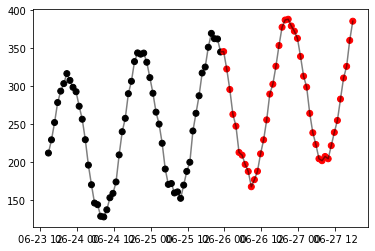

In [68]:
test_df['is_drift'] = drifts
test_df['colour'] = test_df['is_drift'].apply(lambda x: "k" if x==0 else "r")
test_df['threshold'] = thresh
test_df['stat'] = stats

plt.plot(test_df.ds, test_df.y, alpha=0.5, c='k')
plt.scatter(test_df.ds, test_df.y, c=test_df.colour, label=test_df.colour)
plt.show()

# Saving

In [ ]:
from alibi_detect.utils.saving import save_detector

save_detector(detector=od, filepath="./model")